In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [68]:
data=pd.read_csv('creditcard.csv')
data=data.drop_duplicates()

In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [70]:
print(data.isnull().sum().to_string())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0


In [71]:
data["Class"].value_counts()


Class
0    283253
1       473
Name: count, dtype: int64

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='V1', ylabel='Count'>

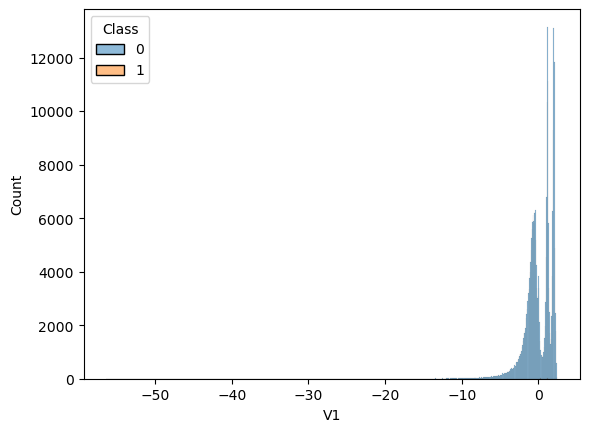

In [72]:
sns.histplot(data=data,x='V1',hue='Class')

In [73]:
dataTrain=data.iloc[56961:]
dataTest=data.iloc[:56961]
X=dataTrain
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
print(X_pca.shape)

(226765, 2)


In [74]:
kmeans = KMeans(n_clusters=2, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

In [75]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<Axes: >

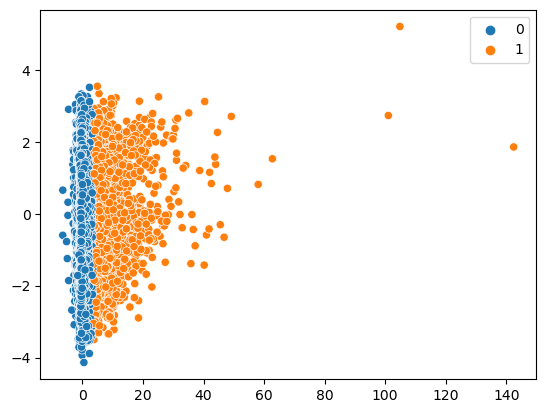

In [76]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters)

In [77]:
testY = dataTest['Class'].to_numpy()
testX = dataTest.drop(columns = ["Class"]).to_numpy()

In [78]:
X=dataTest
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X_normalized)

In [79]:
pred = kmeans.predict(X2_pca)

<Axes: >

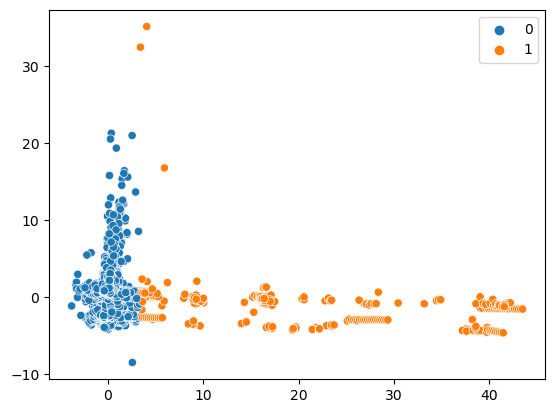

In [80]:
sns.scatterplot(x=X2_pca[:, 0], y=X2_pca[:, 1], hue=pred)

In [81]:
np.mean(testY==pred)*100

99.80864099998244